In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn import linear_model
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/glass/glass.csv


In [ ]:
grass_base=pd.read_csv('../input/glass/glass.csv')
#grass_base=grass_base.dropna()
grass_base.info() #feature output

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


<AxesSubplot:>

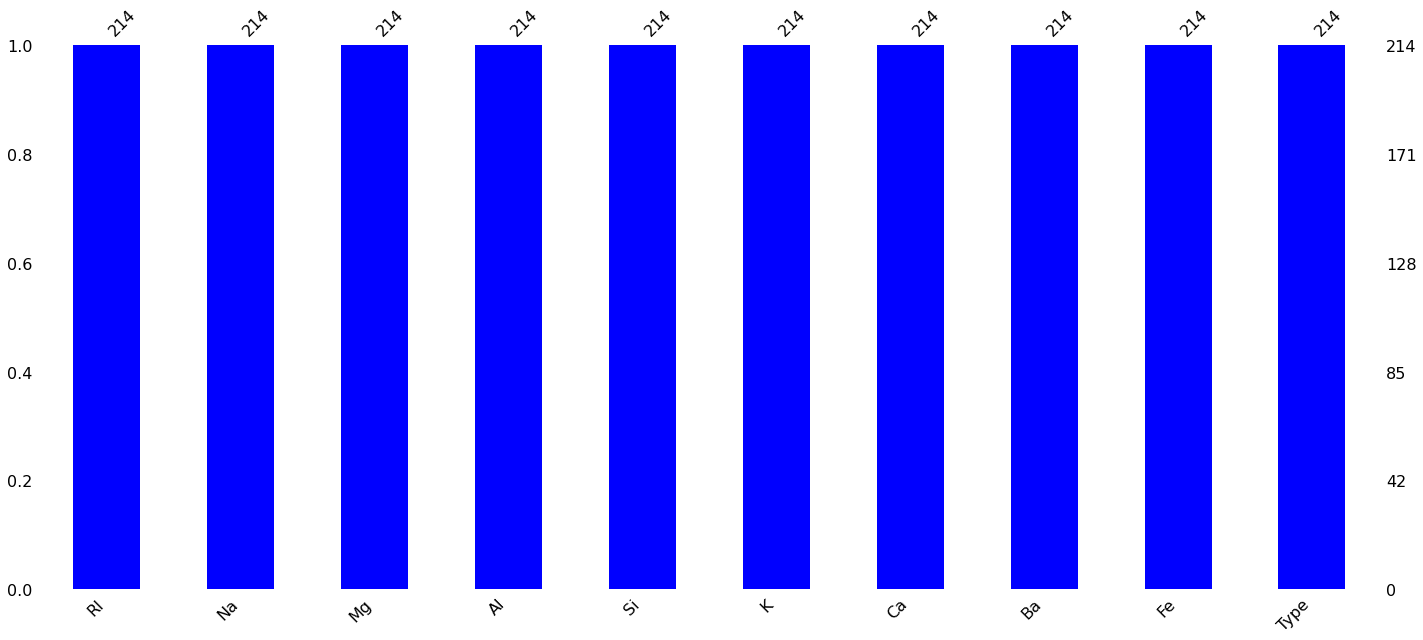

In [ ]:
#Missing data visualization
msno.bar(grass_base, color = 'b', labels = True)

In [ ]:
grass_base.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
grass_base.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


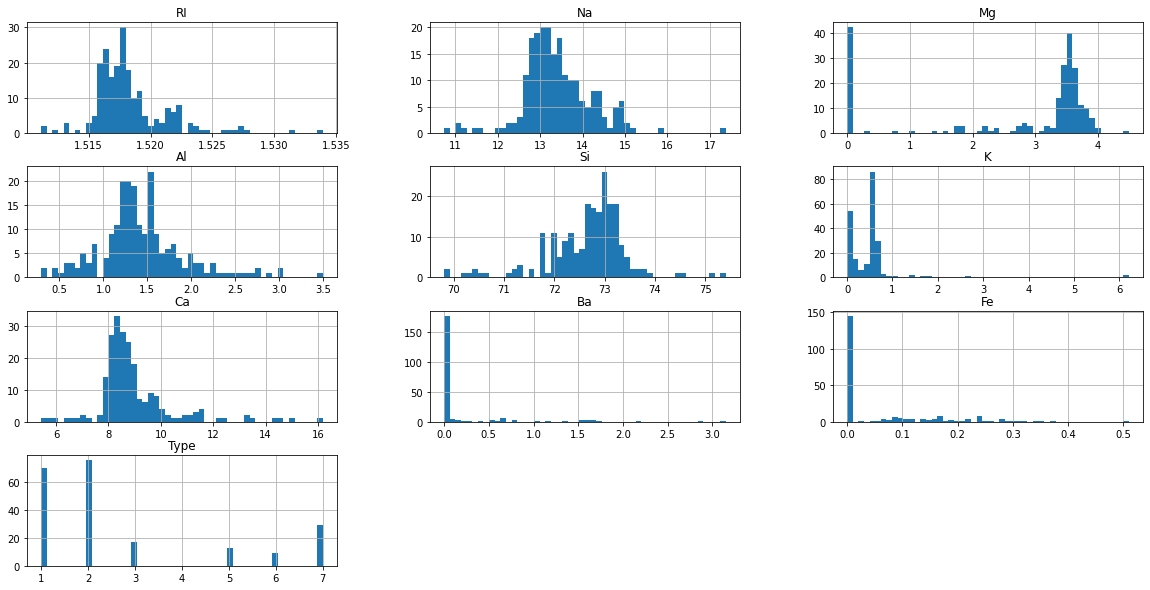

In [ ]:
grass_base.hist(bins=50, figsize=(20,10))
plt.show()

<AxesSubplot:>

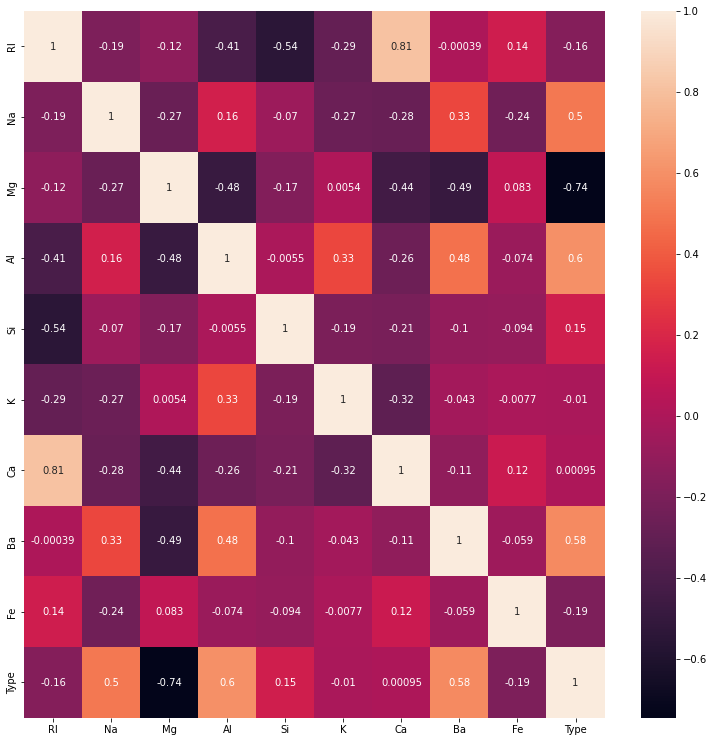

In [ ]:
fig = plt.figure(figsize=(13,13))
sns.heatmap(data=grass_base.corr(),annot=True)

In [ ]:
grass_base['Type'].unique()

array([1, 2, 3, 5, 6, 7])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Type', ylabel='count'>

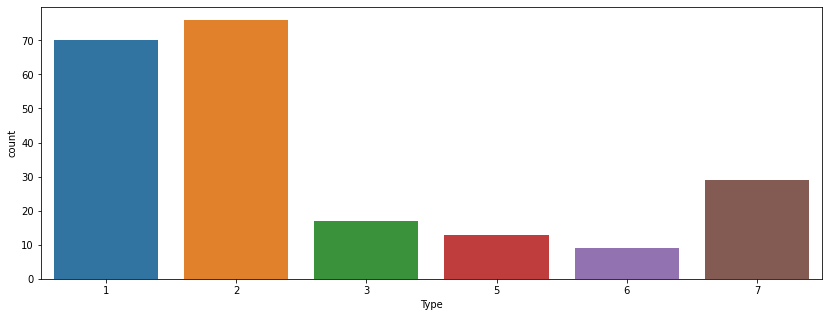

In [ ]:
fig = plt.figure(figsize=(14,5))
sns.countplot(grass_base['Type'])

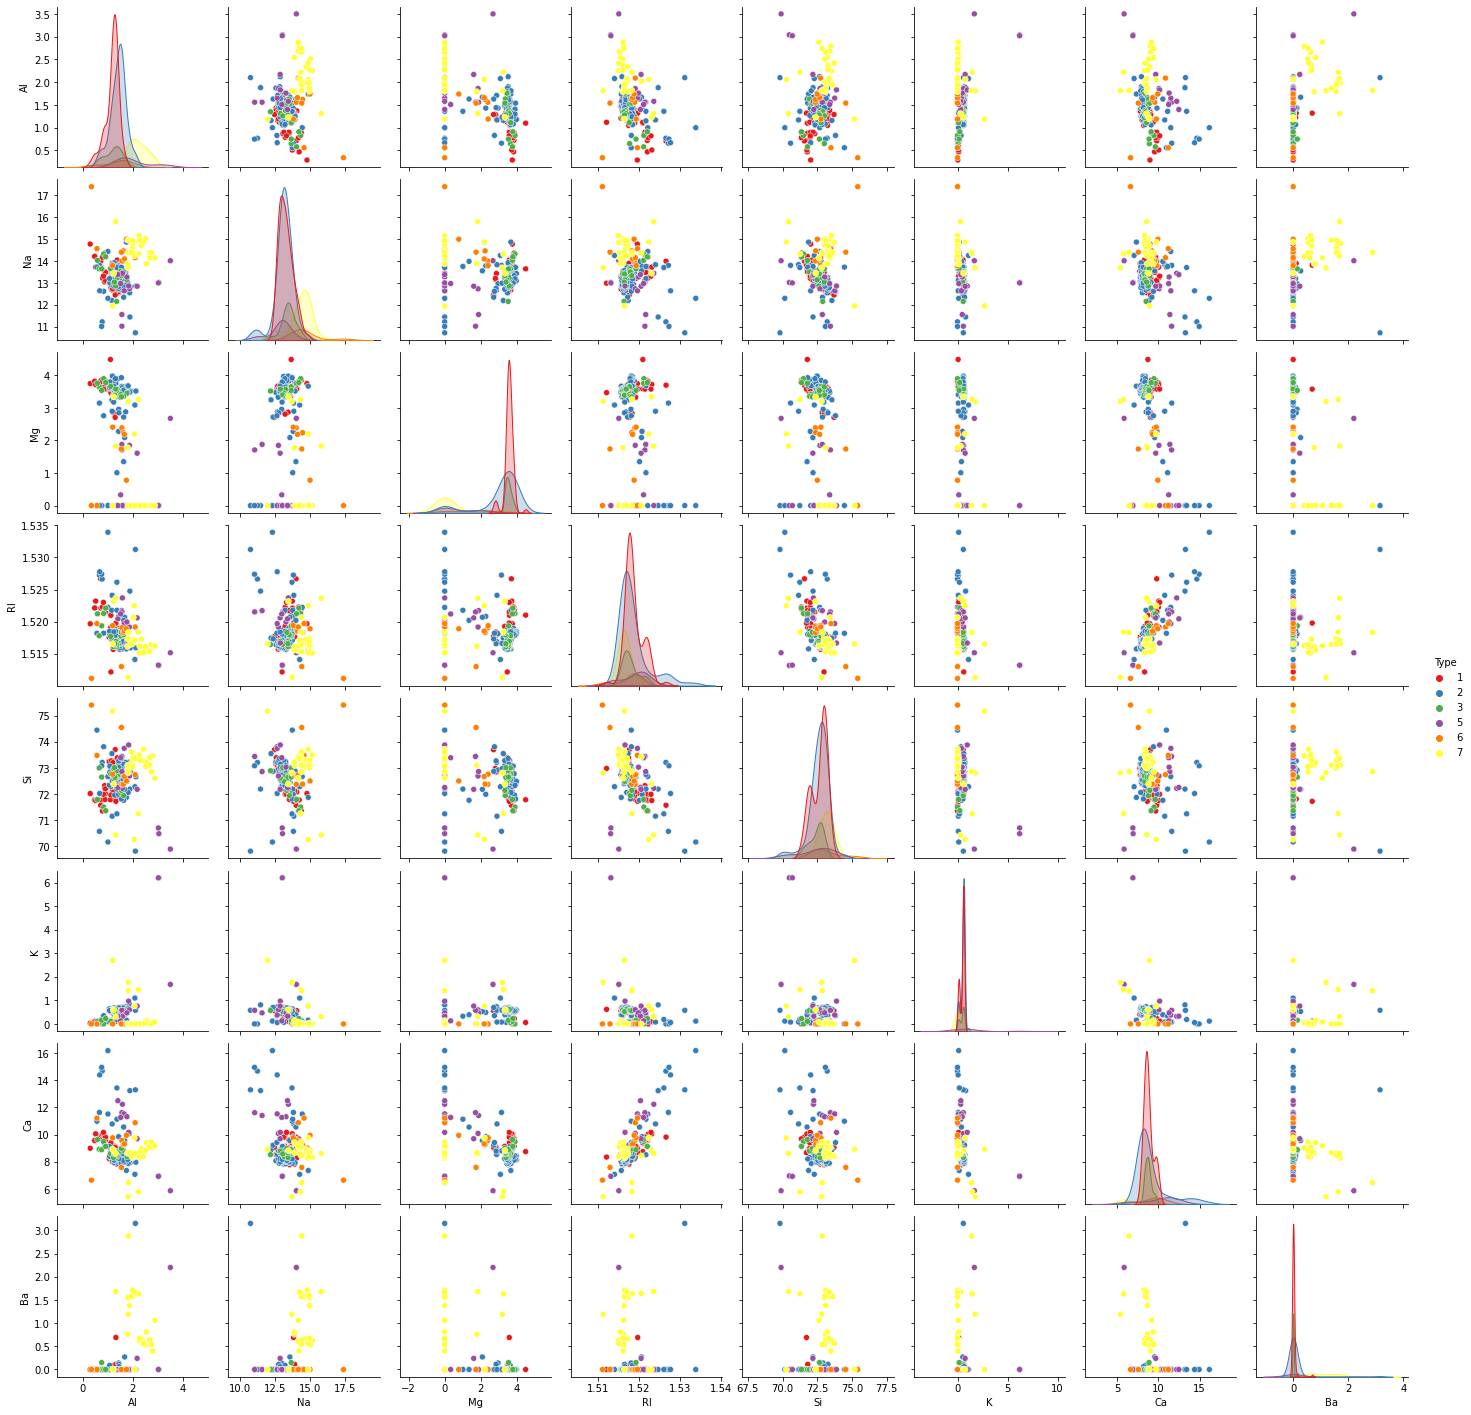

In [ ]:
feature_names = ['Al', 'Na', 'Mg', 'RI', 'Si', 'K', 'Ca', 'Ba']
sns.pairplot(grass_base, hue="Type", palette = 'Set1', vars=feature_names)

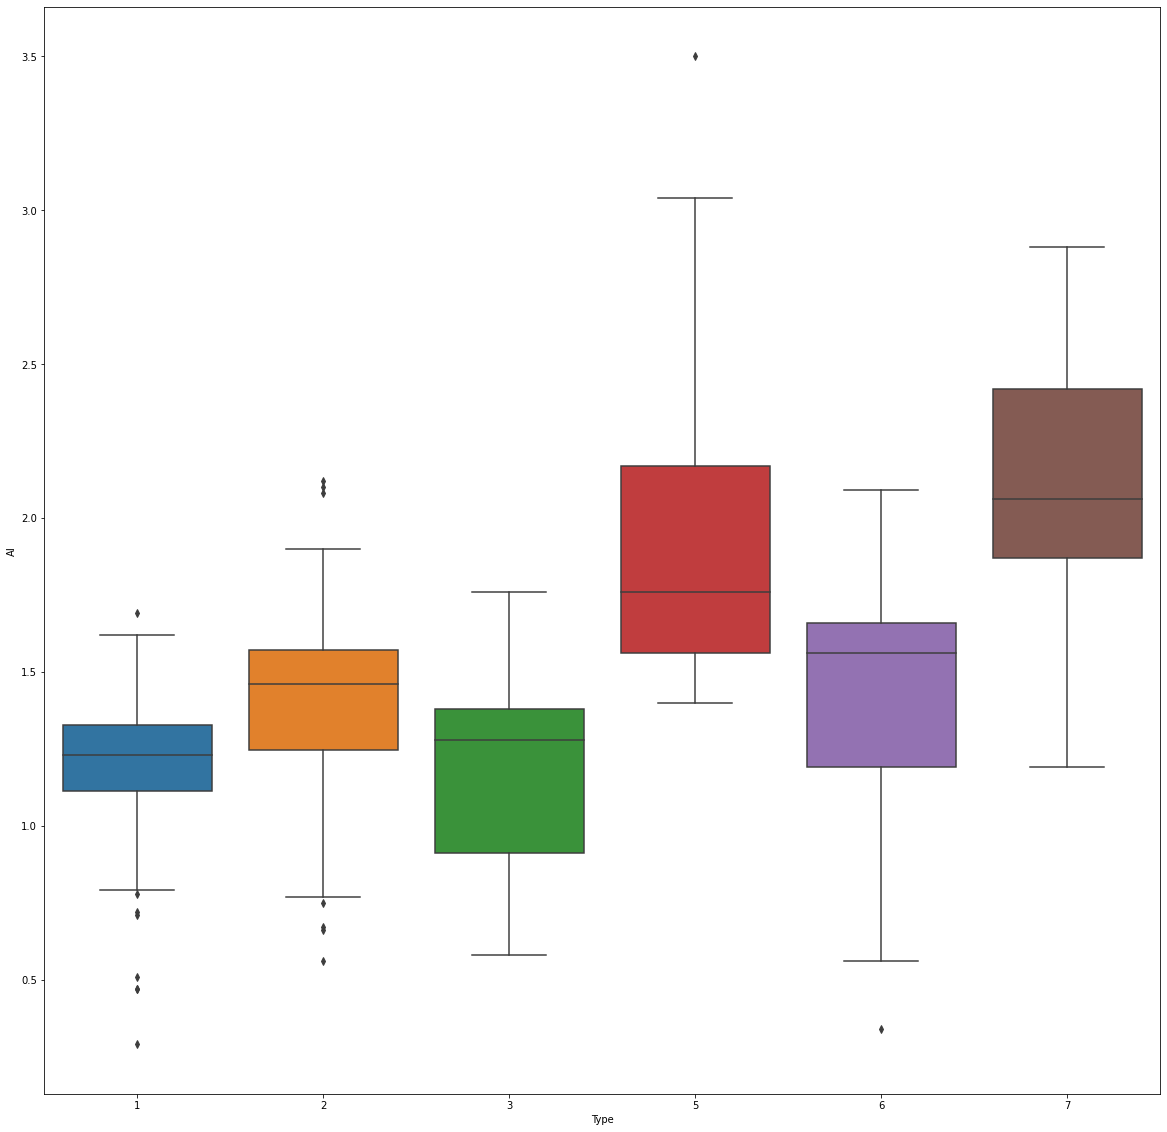

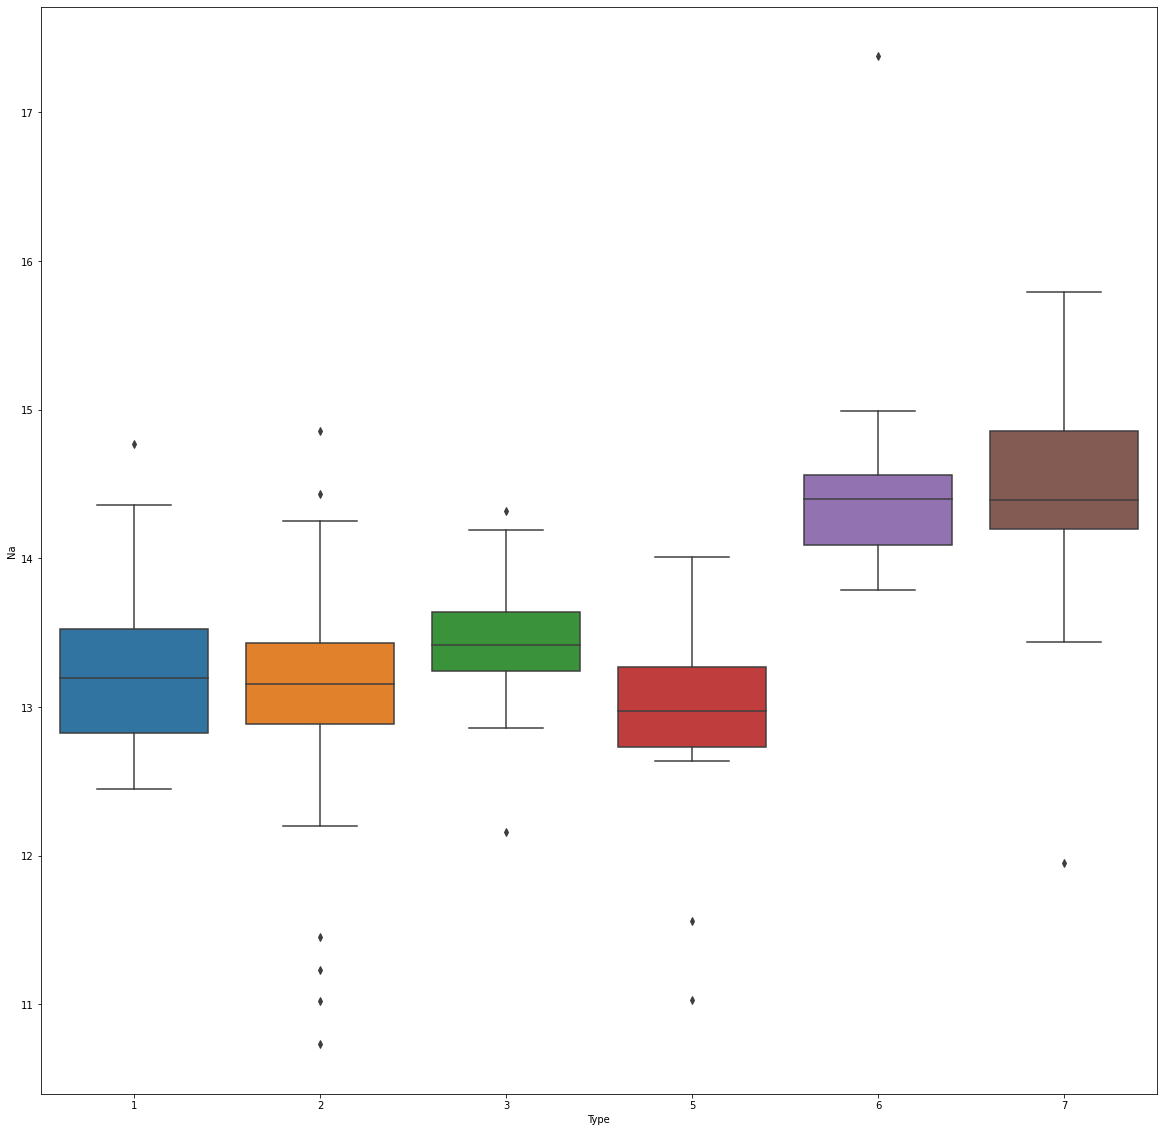

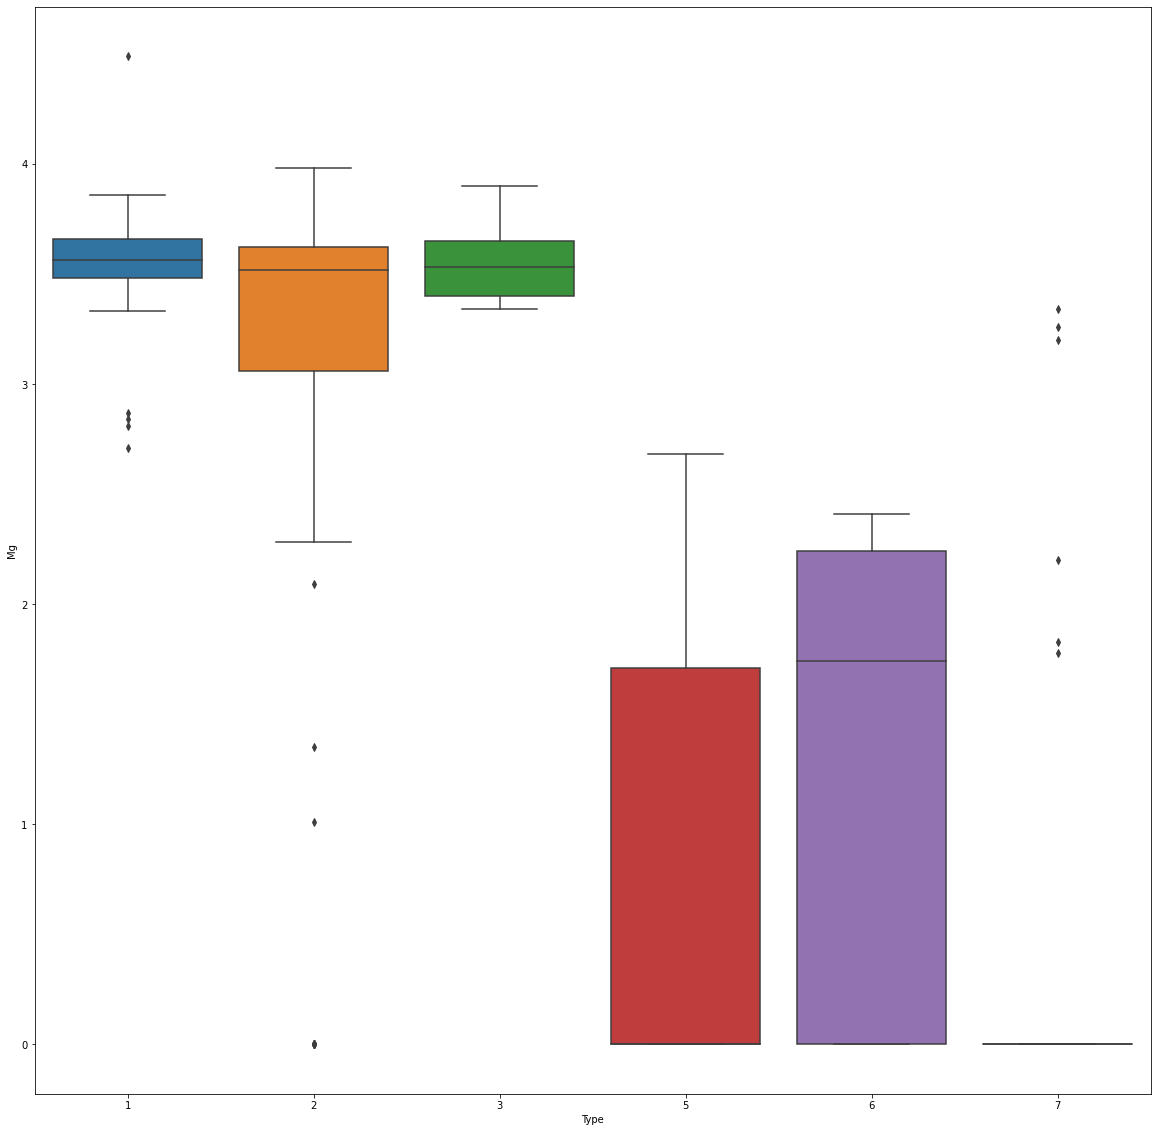

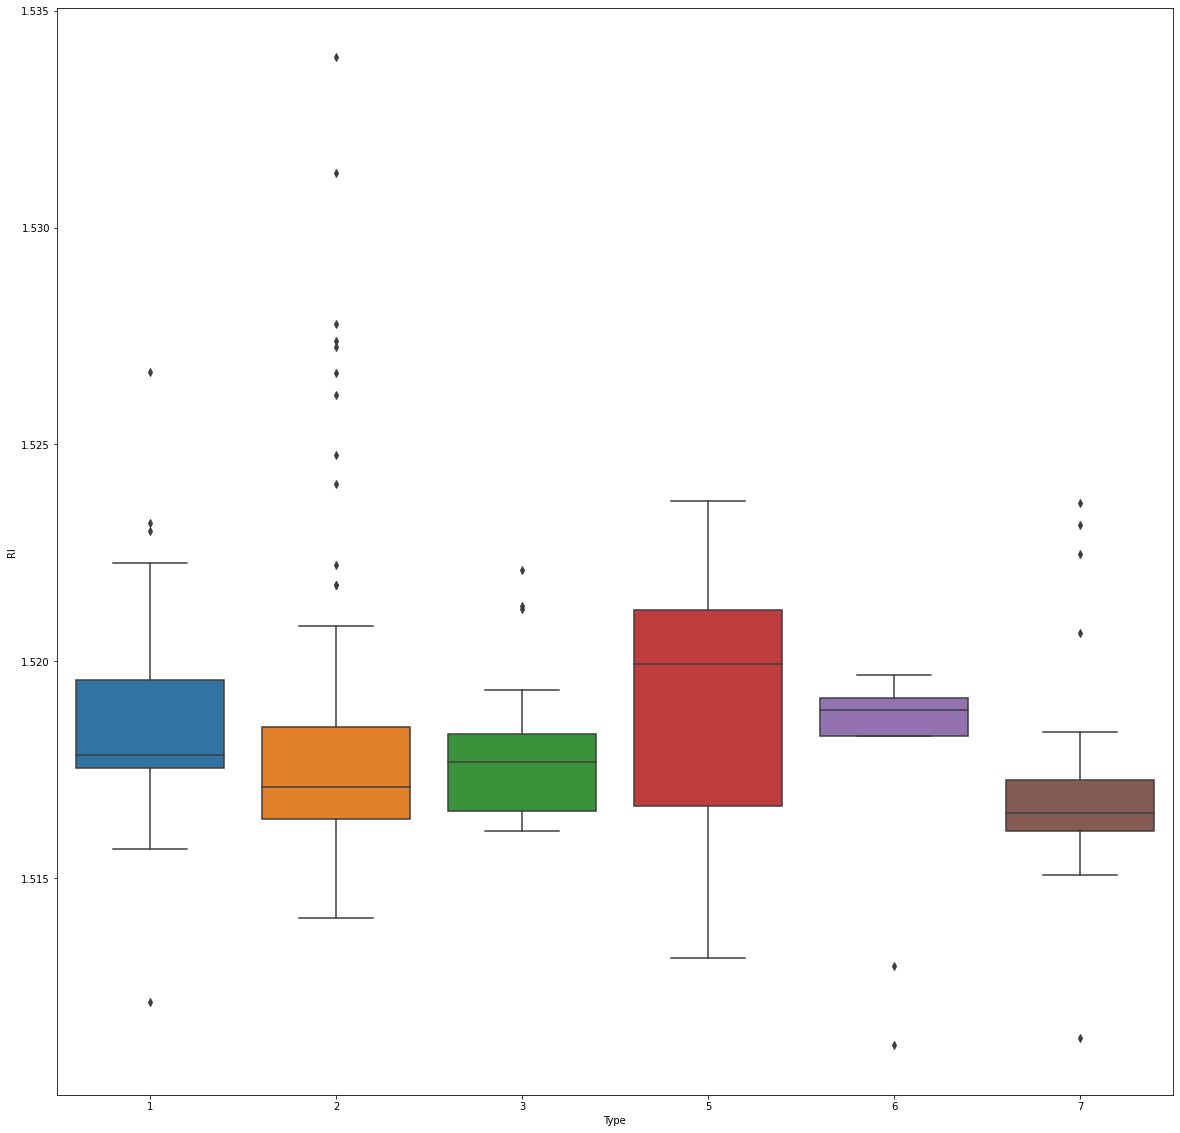

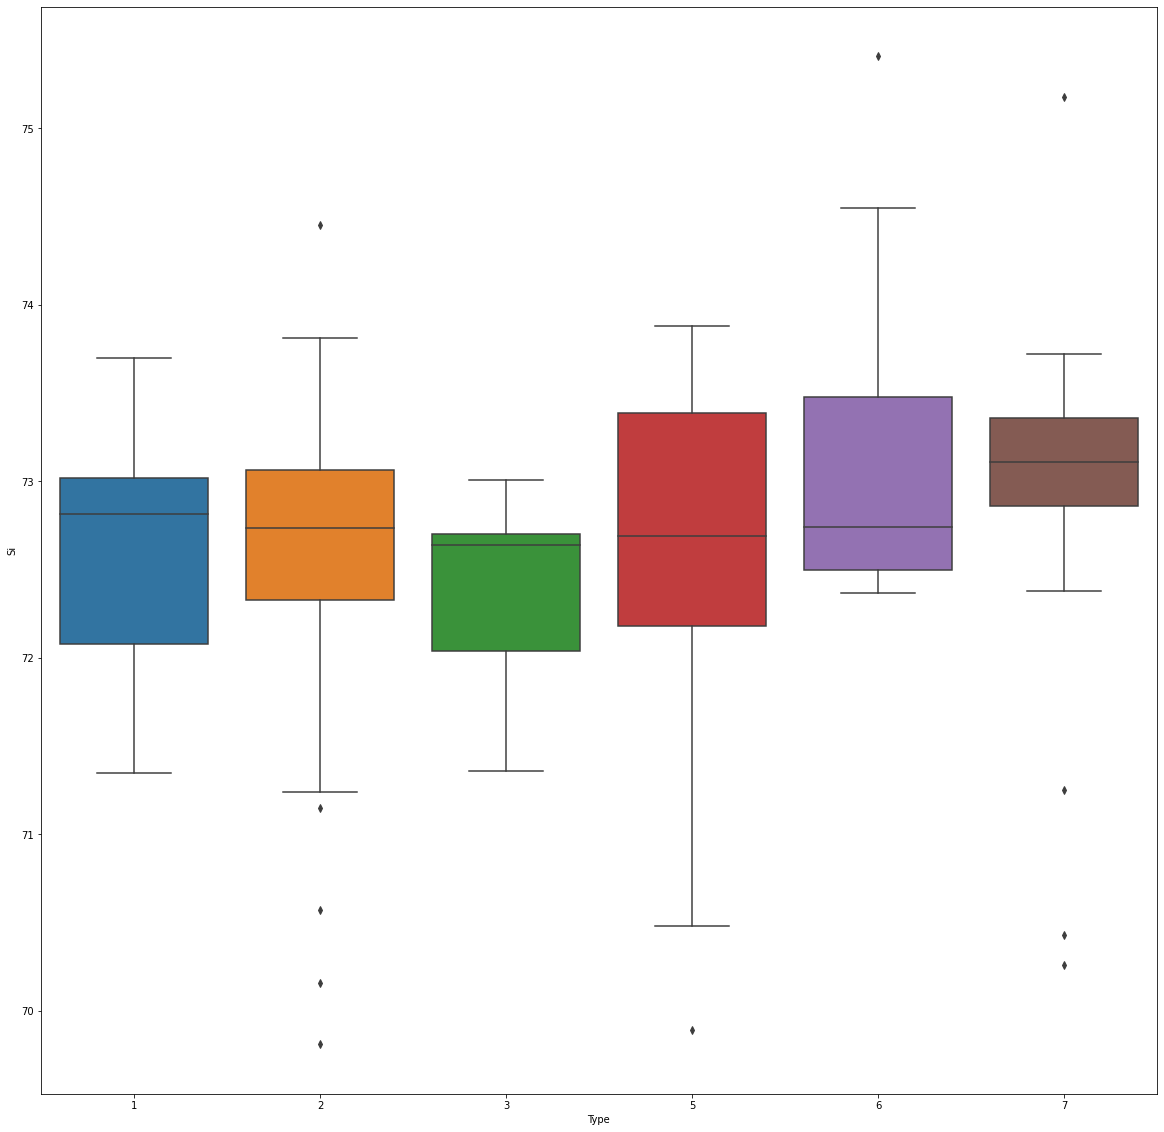

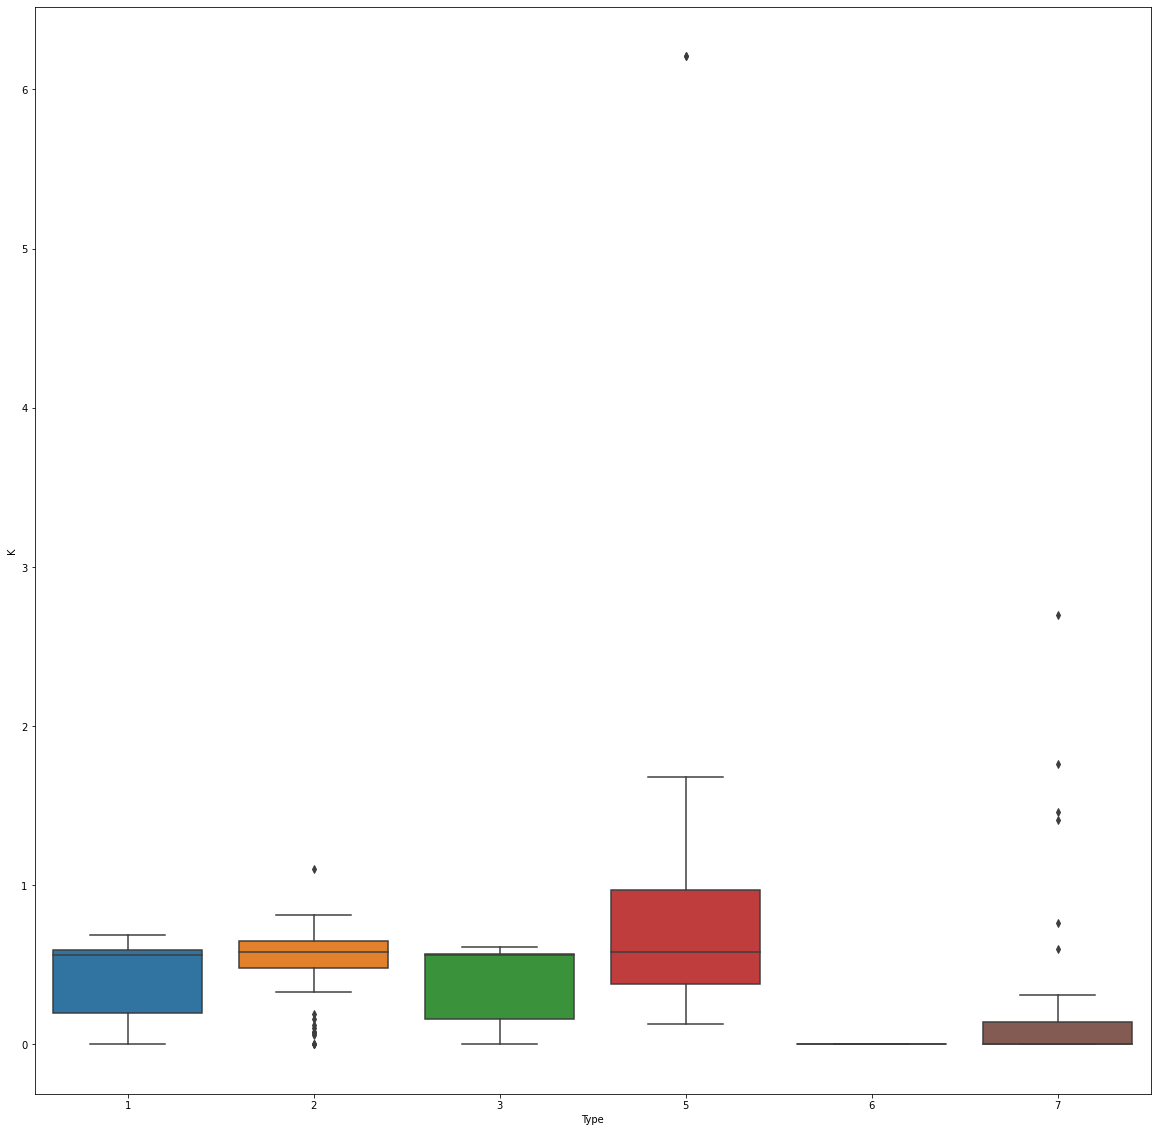

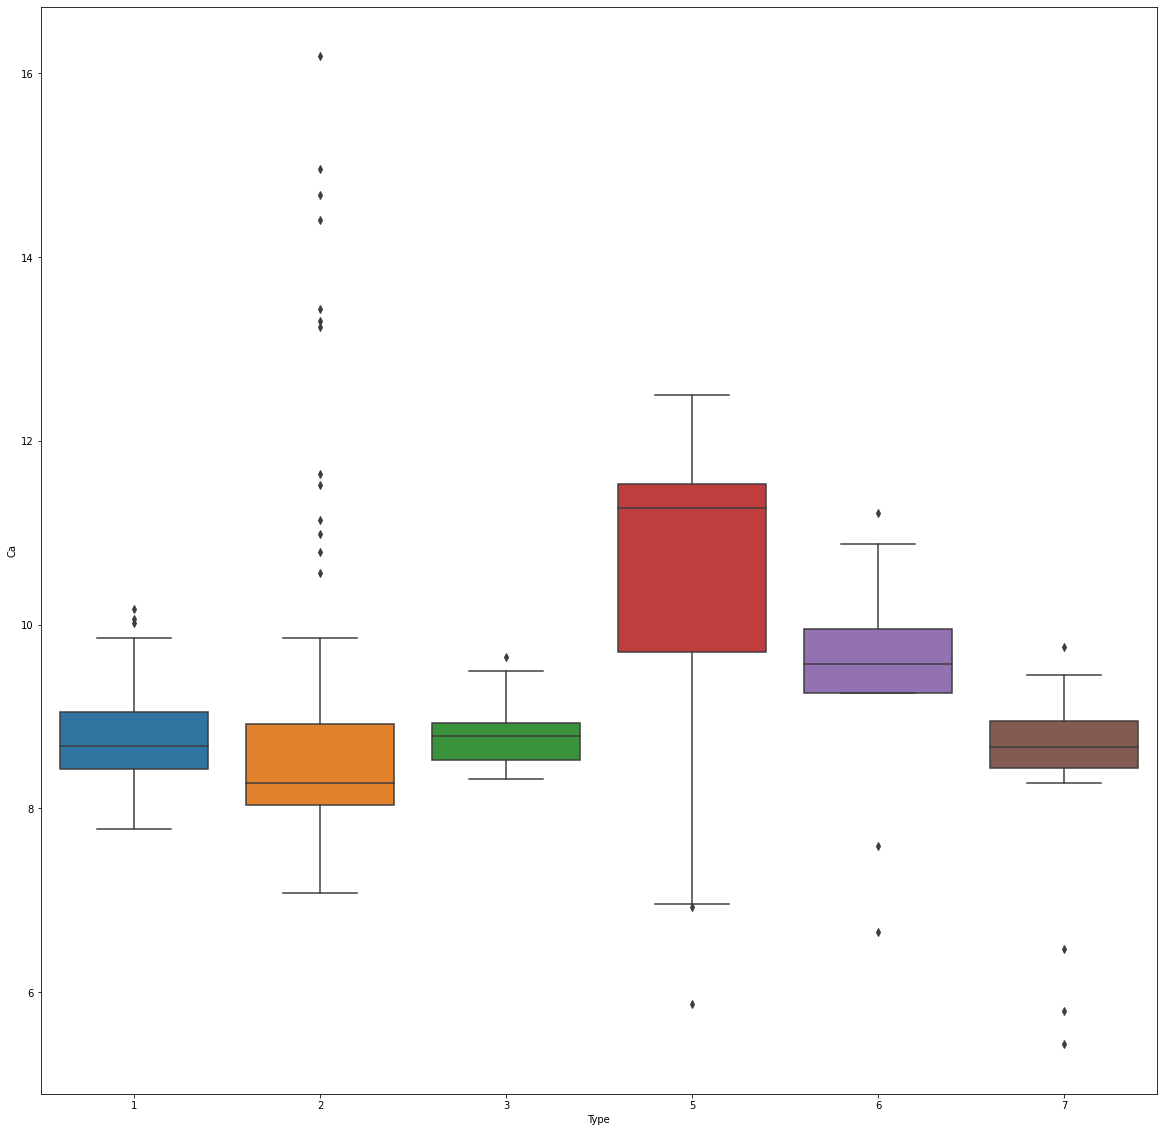

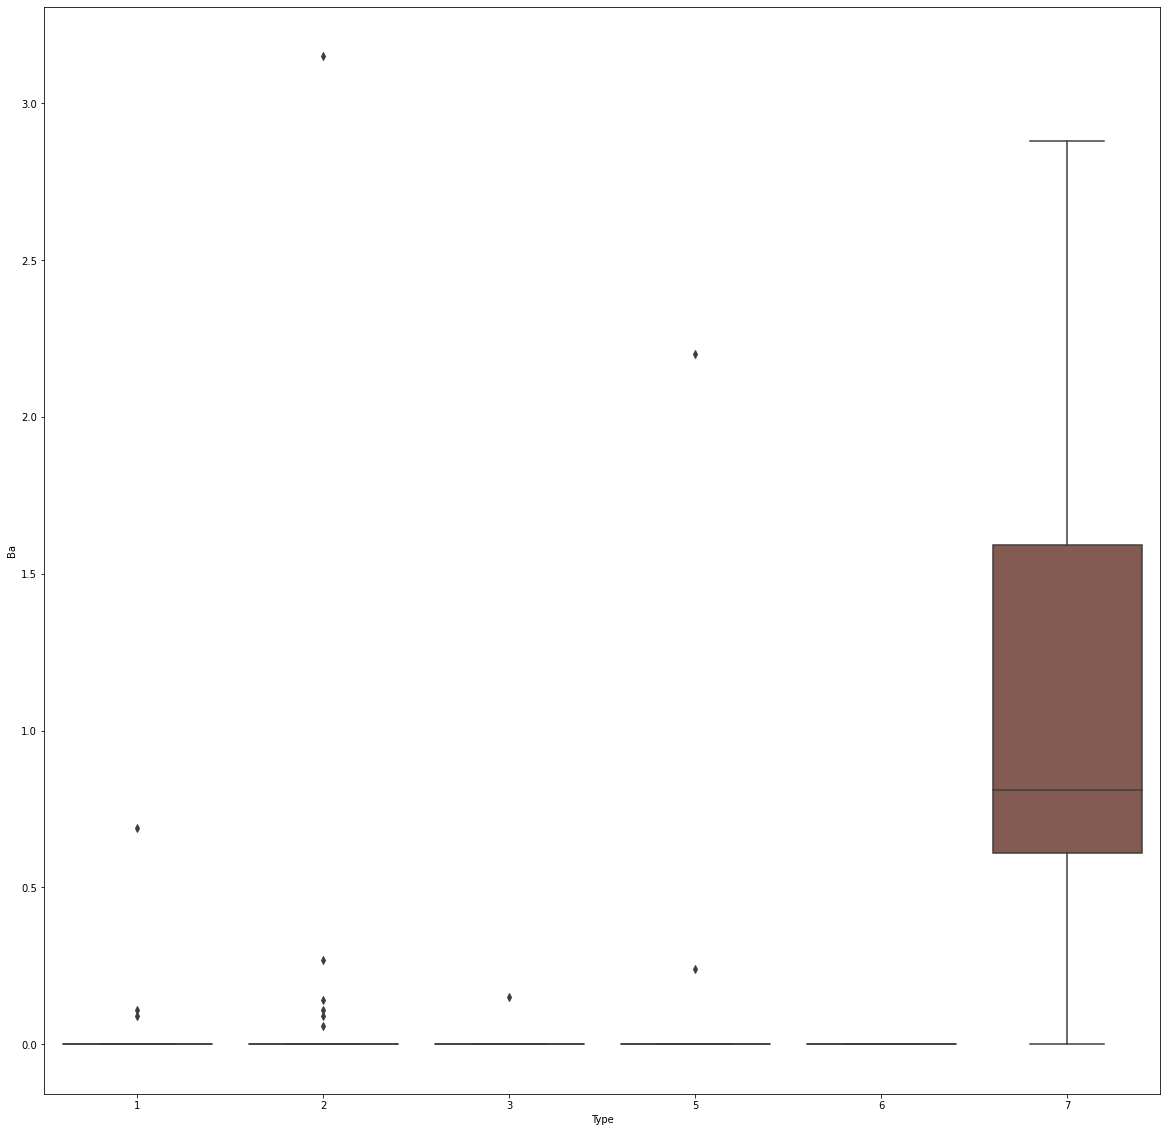

In [ ]:
#Box plot
for i in range(len(feature_names)):
    fig=plt.figure(figsize=(20,20))
    ax = sns.boxplot(y=feature_names[i], x='Type', data=grass_base)

In [ ]:
from sklearn.model_selection import train_test_split
X = grass_base.drop('Type',axis=1)
Xx = X.drop(['Fe', 'Ba'],axis=1)
Y = grass_base['Type']
X_train, X_test, Y_train, Y_test = train_test_split(Xx, Y, test_size=0.40, random_state=102)
# Feng Shui 
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

![image.png](attachment:6af60041-f14e-4561-8c8e-f64e95a9cef4.png)

Accuracy (train):  0.734375
Accuracy (test) :  0.6395348837209303
              precision    recall  f1-score   support

           1       0.61      0.87      0.72        31
           2       0.65      0.57      0.61        30
           3       0.00      0.00      0.00         7
           5       1.00      0.20      0.33         5
           6       1.00      0.33      0.50         3
           7       0.75      0.90      0.82        10

    accuracy                           0.64        86
   macro avg       0.67      0.48      0.50        86
weighted avg       0.63      0.64      0.60        86



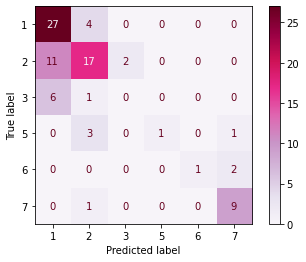

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kNN_model=KNeighborsClassifier(n_neighbors=5)
kNN_model_res = kNN_model.fit(X_train,Y_train)
Y_pred = kNN_model_res.predict(X_test)
print('Accuracy (train): ', kNN_model_res.score(X_train, Y_train))
print('Accuracy (test) : ', kNN_model_res.score(X_test, Y_test))
# We can visualize this
from sklearn.metrics import plot_confusion_matrix, classification_report
print(classification_report(Y_test, Y_pred))
plot_confusion_matrix(kNN_model_res, X_test, Y_test, cmap = plt.cm.PuRd)

In [ ]:
error_rate = []

for i in range(1,40):
    kNN_model = KNeighborsClassifier(n_neighbors=i)
    kNN_model.fit(X_train,Y_train)
    pred_i = kNN_model.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

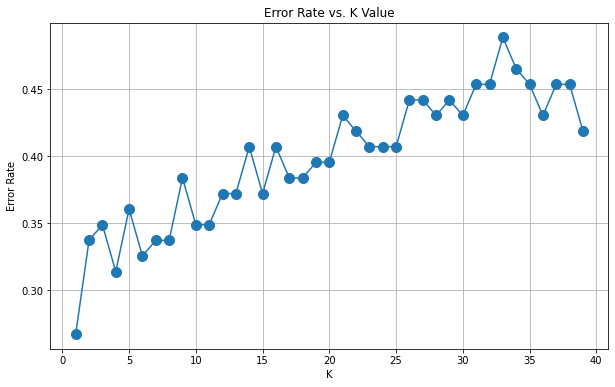

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

Accuracy (train):  0.859375
Accuracy (test) :  0.6627906976744186
              precision    recall  f1-score   support

           1       0.57      0.87      0.69        31
           2       0.73      0.53      0.62        30
           3       0.00      0.00      0.00         7
           5       1.00      0.40      0.57         5
           6       1.00      1.00      1.00         3
           7       1.00      0.90      0.95        10

    accuracy                           0.66        86
   macro avg       0.72      0.62      0.64        86
weighted avg       0.67      0.66      0.64        86



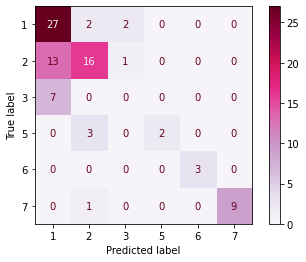

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kNN_model=KNeighborsClassifier(n_neighbors=2)
kNN_model_res = kNN_model.fit(X_train,Y_train)
Y_pred = kNN_model_res.predict(X_test)
print('Accuracy (train): ', kNN_model_res.score(X_train, Y_train))
print('Accuracy (test) : ', kNN_model_res.score(X_test, Y_test))
# We can visualize this
from sklearn.metrics import plot_confusion_matrix, classification_report
print(classification_report(Y_test, Y_pred))
plot_confusion_matrix(kNN_model_res, X_test, Y_test, cmap = plt.cm.PuRd)

Accuracy (train):  0.703125
Accuracy (test) :  0.6511627906976745


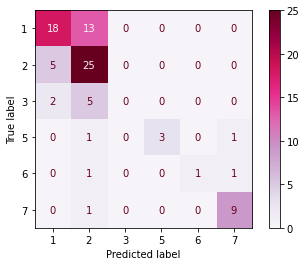

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
# random_state = 0, I fix the initial value because otherwise there will be different accuracy every run 
# and it is impossible to analyze anything
DTClassifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, splitter = 'random', min_samples_split = 2, random_state = 102).fit(X_train, Y_train) # create Decision Tree classifier
Y_pred = DTClassifier.predict(X_test)
print('Accuracy (train): ', DTClassifier.score(X_train, Y_train))
print('Accuracy (test) : ', DTClassifier.score(X_test, Y_test))
# We can visualize this
plot_confusion_matrix(DTClassifier, X_test, Y_test, cmap = plt.cm.PuRd)

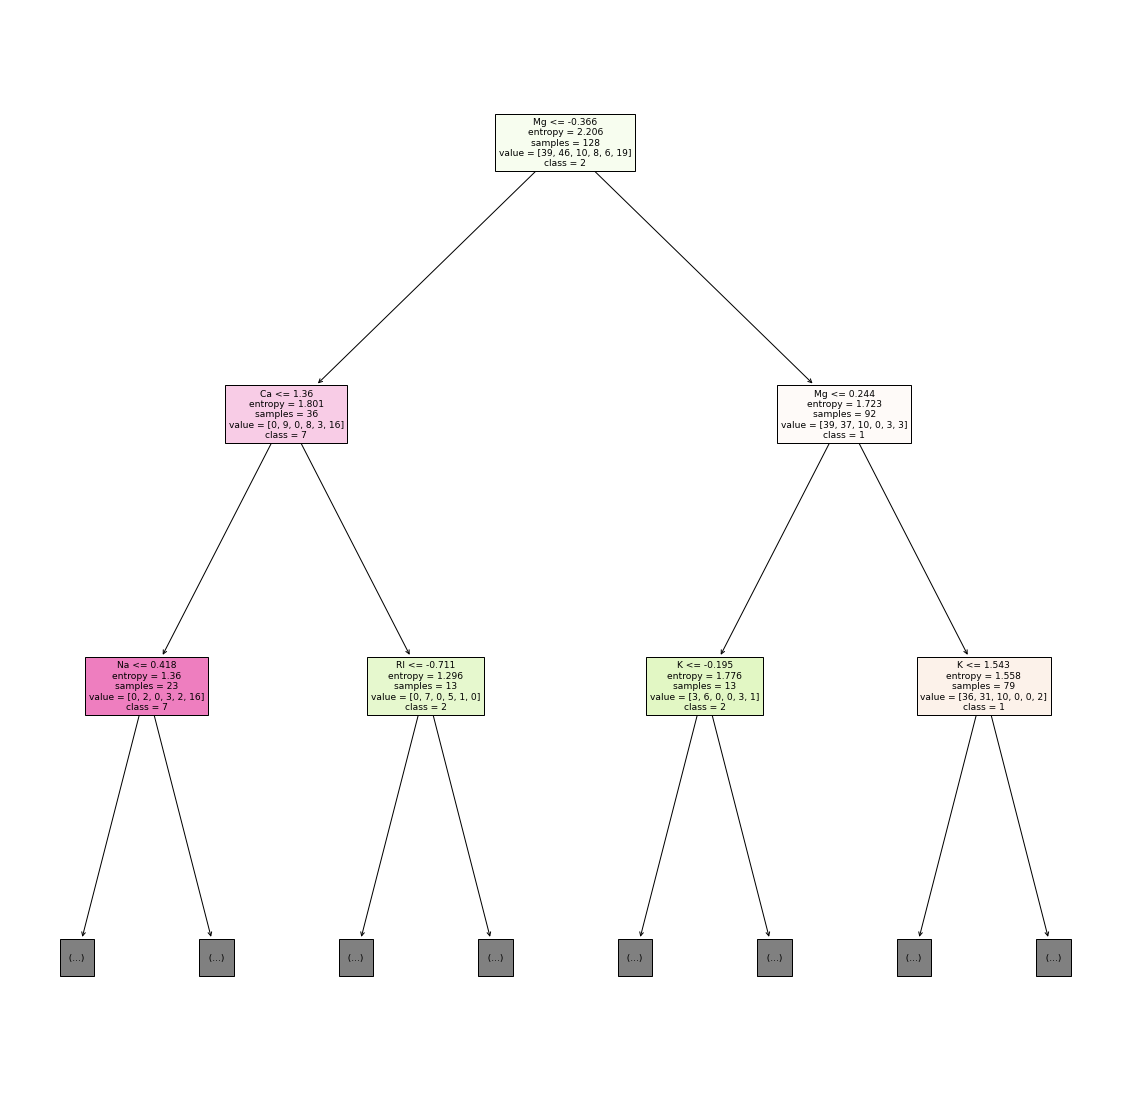

In [ ]:
plt.figure(figsize = (20, 20))
plot_tree(DTClassifier, feature_names = ['Al', 'Na', 'Mg', 'RI', 'Si', 'K', 'Ca'], 
          class_names = ['1', '2', '3', '5', '6', '7'], max_depth = 2, filled = True)
plt.show()

Accuracy (train):  0.9140625
Accuracy (test) :  0.6744186046511628


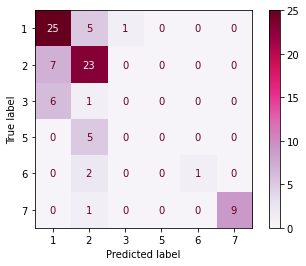

In [ ]:
from sklearn.svm import SVC
SVC_model = SVC(C=1, gamma = 1.0, kernel = 'rbf', random_state = 3)
SVC_model.fit(X_train,Y_train)
Y_pred = SVC_model.predict(X_test)
print('Accuracy (train): ', SVC_model.score(X_train, Y_train))
print('Accuracy (test) : ', SVC_model.score(X_test, Y_test))
# We can visualize this
plot_confusion_matrix(SVC_model, X_test, Y_test, cmap = plt.cm.PuRd)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid_scv = {'C': [0.1, 1, 10, 50, 100, 500, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid_scv, refit=True)
grid.fit(X_train,Y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 50, 100, 500, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [ ]:
grid.best_params_

{'C': 50, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
grid.best_estimator_

SVC(C=50, gamma=0.1)

Accuracy (train):  0.90625
Accuracy (test) :  0.686046511627907
              precision    recall  f1-score   support

           1       0.60      0.81      0.68        31
           2       0.70      0.53      0.60        30
           3       0.75      0.43      0.55         7
           5       1.00      0.80      0.89         5
           6       1.00      0.67      0.80         3
           7       0.82      0.90      0.86        10

    accuracy                           0.69        86
   macro avg       0.81      0.69      0.73        86
weighted avg       0.71      0.69      0.68        86



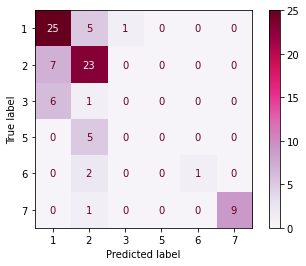

In [ ]:
Y_pred = grid.predict(X_test)
print('Accuracy (train): ', grid.score(X_train, Y_train))
print('Accuracy (test) : ', grid.score(X_test, Y_test))
print(classification_report(Y_test,Y_pred))
# We can visualize this
plot_confusion_matrix(SVC_model, X_test, Y_test, cmap = plt.cm.PuRd)

Accuracy (train):  1.0
Accuracy (test) :  0.7325581395348837
              precision    recall  f1-score   support

           1       0.72      0.84      0.78        31
           2       0.76      0.63      0.69        30
           3       0.29      0.29      0.29         7
           5       0.80      0.80      0.80         5
           6       1.00      0.67      0.80         3
           7       0.91      1.00      0.95        10

    accuracy                           0.73        86
   macro avg       0.75      0.70      0.72        86
weighted avg       0.74      0.73      0.73        86



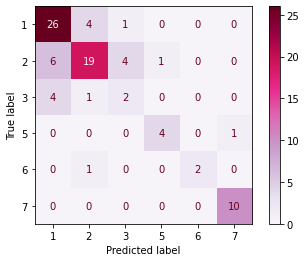

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFClassifier = RandomForestClassifier(n_estimators = 10, criterion = 'gini', random_state = 7).fit(X_train, Y_train)
Y_pred = RFClassifier.predict(X_test)
print('Accuracy (train): ', RFClassifier.score(X_train, Y_train))
print('Accuracy (test) : ', RFClassifier.score(X_test, Y_test))
print(classification_report(Y_test,Y_pred))
# We can visualize this
plot_confusion_matrix(RFClassifier, X_test, Y_test, cmap = plt.cm.PuRd)

In [ ]:
param_grid_RF = {'n_estimators' : [2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 70, 100], 'criterion' : ['gini', 'entropy']}
grid = GridSearchCV(RandomForestClassifier(), param_grid_RF, refit=True)
grid.fit(X_train,Y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50,
                                          70, 100]})

In [ ]:
grid.best_params_

{'criterion': 'gini', 'n_estimators': 50}

Accuracy (train):  1.0
Accuracy (test) :  0.7441860465116279


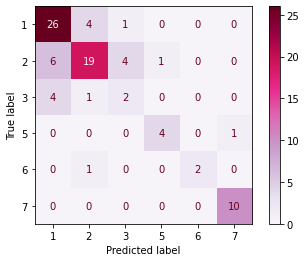

In [ ]:
Y_pred = grid.predict(X_test)
print('Accuracy (train): ', grid.score(X_train, Y_train))
print('Accuracy (test) : ', grid.score(X_test, Y_test))
# We can visualize this
plot_confusion_matrix(RFClassifier, X_test, Y_test, cmap = plt.cm.PuRd)

Accuracy (train):  0.5234375
Accuracy (test) :  0.5116279069767442


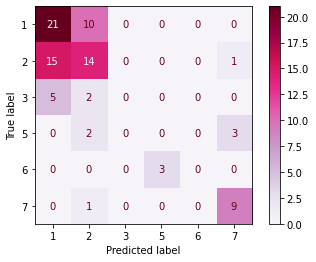

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
Ada_lassifier = AdaBoostClassifier(n_estimators = 10, algorithm = 'SAMME', random_state = 43).fit(X_train, Y_train)
Y_pred = Ada_lassifier.predict(X_test)
print('Accuracy (train): ', Ada_lassifier.score(X_train, Y_train))
print('Accuracy (test) : ', Ada_lassifier.score(X_test, Y_test))
# We can visualize this
plot_confusion_matrix(Ada_lassifier, X_test, Y_test, cmap = plt.cm.PuRd)

In [ ]:
param_grid_Ada = {'n_estimators' : [2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 70, 80, 100], 'algorithm' : ['SAMME', 'SAMME.R']}
grid = GridSearchCV(AdaBoostClassifier(), param_grid_Ada, refit=True)
grid.fit(X_train,Y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50,
                                          70, 80, 100]})

In [ ]:
grid.best_params_

{'algorithm': 'SAMME', 'n_estimators': 70}

Accuracy (train):  0.578125
Accuracy (test) :  0.4883720930232558


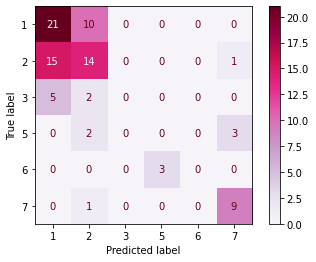

In [ ]:
Y_pred = grid.predict(X_test)
print('Accuracy (train): ', grid.score(X_train, Y_train))
print('Accuracy (test) : ', grid.score(X_test, Y_test))
# We can visualize this
plot_confusion_matrix(Ada_lassifier, X_test, Y_test, cmap = plt.cm.PuRd)